<a href="https://colab.research.google.com/github/aditya-got/adityadhardwivedi.github.io/blob/main/Aditya_Dhar_Dwivedi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/Salary Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.shape

(375, 6)

In [6]:
df.isna().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [7]:
df = df.dropna()

In [8]:
df.shape

(373, 6)

In [9]:
df['Salary'].value_counts()

,count
Salary,
40000.0,31
50000.0,22
95000.0,22
120000.0,20
180000.0,20
45000.0,18
150000.0,18
90000.0,18
160000.0,17


<Axes: xlabel='Salary', ylabel='Count'>

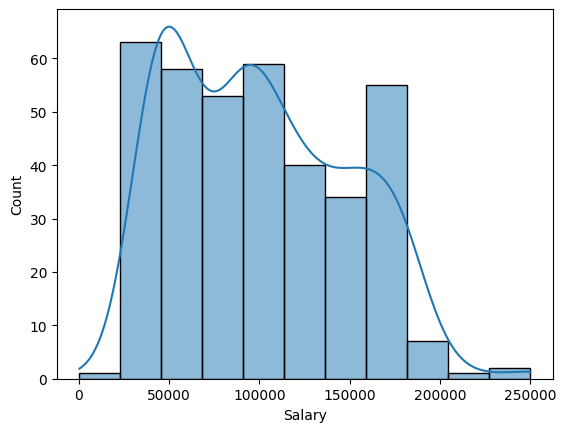

In [11]:
sns.histplot(df['Salary'],kde=True)

In [12]:
df.groupby('Age')['Salary'].mean()
df.groupby('Gender')['Salary'].mean()
df.groupby('Education Level')['Salary'].mean()
df.groupby('Job Title')['Salary'].mean()
df.groupby('Years of Experience')['Salary'].mean()

,Salary
Years of Experience,
0.0,33333.333333
0.5,35000.000000
1.0,37857.142857
1.5,36279.166667
2.0,41774.193548
3.0,51166.666667
4.0,58500.000000
5.0,64117.647059
6.0,83750.000000


In [13]:
df['Age'] = df.groupby('Age')['Salary'].transform("mean")
df['Gender'] = df.groupby('Gender')['Salary'].transform("mean")
df['Education Level'] = df.groupby('Education Level')['Salary'].transform("mean")
df['Job Title'] = df.groupby('Job Title')['Salary'].transform("mean")
df['Years of Experience'] = df.groupby('Years of Experience')['Salary'].transform("mean")


In [14]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,66666.666667,103867.783505,74756.026786,90000.0,64117.647059,90000.0
1,41538.461538,97011.173184,129795.918367,72500.0,51166.666667,65000.0
2,153529.411765,103867.783505,157843.137255,160000.0,134375.000000,150000.0
3,87000.000000,97011.173184,74756.026786,50000.0,84444.444444,60000.0
4,206666.666667,103867.783505,129795.918367,200000.0,168846.153846,200000.0


In [15]:
x=df.drop("Salary",axis=1)
y=df["Salary"]

In [18]:
y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
370,85000.0
371,170000.0
372,40000.0
373,90000.0


In [19]:
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,66666.666667,103867.783505,74756.026786,90000.000000,64117.647059
1,41538.461538,97011.173184,129795.918367,72500.000000,51166.666667
2,153529.411765,103867.783505,157843.137255,160000.000000,134375.000000
3,87000.000000,97011.173184,74756.026786,50000.000000,84444.444444
4,206666.666667,103867.783505,129795.918367,200000.000000,168846.153846
...,...,...,...,...,...
370,89772.727273,97011.173184,74756.026786,89444.444444,88800.000000
371,141250.000000,103867.783505,129795.918367,172727.272727,166333.333333
372,42841.304348,97011.173184,74756.026786,47000.000000,41774.193548
373,90000.000000,103867.783505,74756.026786,97500.000000,84444.444444


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape,x_test.shape

((298, 5), (75, 5))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_new=scaler.fit_transform(x_train)

In [23]:
x_train=pd.DataFrame(x_new,columns=x_train.columns)

In [24]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience
0,-0.239333,0.986666,-0.772097,0.452971,-0.361128
1,0.067561,0.986666,-0.772097,0.258102,-0.004302
2,-1.291894,-1.013514,-0.772097,-1.283132,-1.306181
3,-0.671774,0.986666,-0.772097,-1.006773,-0.811322
4,-0.671774,-1.013514,0.921278,-0.220212,-0.361128
...,...,...,...,...,...
293,-0.174234,-1.013514,-0.772097,-0.751672,-0.005532
294,-1.206514,-1.013514,-0.772097,-1.070548,-1.098158
295,0.067561,0.986666,-0.772097,0.265694,-0.264662
296,1.025443,-1.013514,1.784187,1.267876,1.256894


In [25]:
x_new=scaler.transform(x_test)
x_test=pd.DataFrame(x_new,columns=x_test.columns)

In [26]:
x_test

,Age,Gender,Education Level,Job Title,Years of Experience
0,1.633031,0.986666,0.921278,1.604467,1.618926
1,-0.174234,-1.013514,-0.772097,-0.751672,-0.004302
2,1.025443,0.986666,-0.772097,0.895854,1.256894
3,-0.239333,-1.013514,0.921278,-0.149351,-0.376508
4,0.904545,0.986666,1.784187,0.576978,0.935751
...,...,...,...,...,...
70,-0.671774,0.986666,-0.772097,-0.485942,-0.361128
71,0.393055,-1.013514,-0.772097,-0.149351,-0.005532
72,-0.671774,0.986666,-0.772097,-1.070548,-0.935741
73,1.178616,-1.013514,0.921278,1.055292,0.554127


In [27]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,66666.666667,103867.783505,74756.026786,90000.0,64117.647059,90000.0
1,41538.461538,97011.173184,129795.918367,72500.0,51166.666667,65000.0
2,153529.411765,103867.783505,157843.137255,160000.0,134375.000000,150000.0
3,87000.000000,97011.173184,74756.026786,50000.0,84444.444444,60000.0
4,206666.666667,103867.783505,129795.918367,200000.0,168846.153846,200000.0


In [28]:
x1_train=x_train[['Job Title']]
x1_test=x_test[['Job Title']]

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,y_train)

LinearRegression()

In [30]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,66666.666667,103867.783505,74756.026786,90000.0,64117.647059,90000.0
1,41538.461538,97011.173184,129795.918367,72500.0,51166.666667,65000.0
2,153529.411765,103867.783505,157843.137255,160000.0,134375.000000,150000.0
3,87000.000000,97011.173184,74756.026786,50000.0,84444.444444,60000.0
4,206666.666667,103867.783505,129795.918367,200000.0,168846.153846,200000.0


In [31]:
print(lr.coef_)
print(lr.intercept_)

[46853.67292537]
100101.84563758387


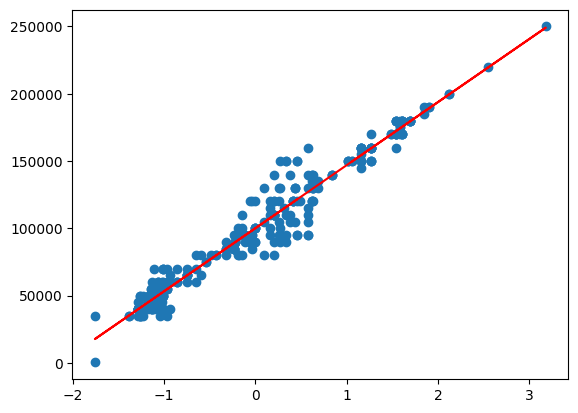

In [32]:
plt.scatter(x1_train,y_train)
plt.plot(x1_train,lr.predict(x1_train),color="red")
plt.show()

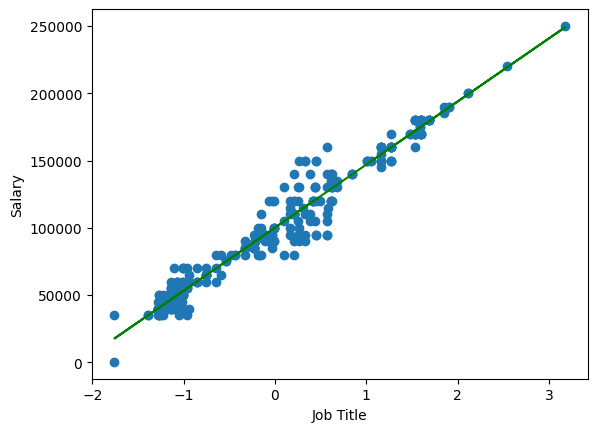

In [34]:
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.scatter(x1_train,y_train)
plt.plot(x1_train,lr.predict(x1_train),color="Green")
plt.show()

In [37]:
y_pred=lr.predict(x1_test)
y_pred[:20]

array([175277.03209967,  64883.23725402, 142075.89079271,  93104.20736494,
       127135.37720458, 149546.14758678, 142075.89079271, 121325.17747586,
        50938.75790509,  94764.26443029, 126858.70102702, 159506.48997887,
        35002.21007775,  91444.15029959, 109704.77801842,  50938.75790509,
        89784.09323424,  49942.72366588,  97254.35002831,  94764.26443029])

In [36]:
lr.score(x1_test,y_test)

0.9522107544152962